In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [6]:
f = cv2.imread("./dataset/cameraman.png")

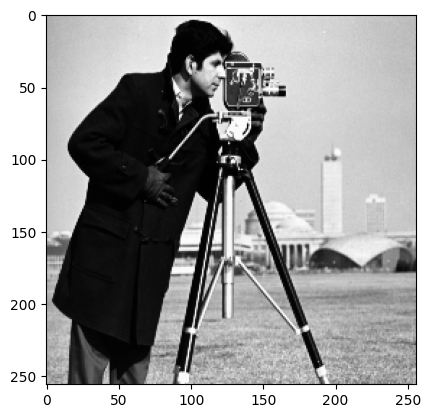

In [12]:
plt.imshow(f)